<a href="https://colab.research.google.com/github/L02mera/CompPhysLM/blob/main/Leonardo_Mera_Lab07_Integration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 07: Numerical Integration

* There are many techniques for implementing numerical integration.  In this lab, you will write code to implement the trapezoid method of integration.

* You will use this function to calculate the integral in several different physical situations.

* You will compare your function with python's built-it numerical integrators.

In [53]:
# import your modules here
import math
import numpy as np
from matplotlib import pyplot as plt


# Part 1: Write a Function to Implement the Trapezoid Integration Method

(5 points)

Write a function called **trap** that does the following.

Input:
* array of y values
* array of x values, spanning from from xmin to xmax


Function should integrate using the trapezoid method.

Return:
* the integral of $f(x)$ between xmin and xmax

In [54]:
# write your function here
def trap(y,x):
  Area_Trap = 0
  for i in range(1,len(x)):
    Area_Trap += 1/2 * (y[i-1] + y[i]) * (x[i]-x[i-1])
  return Area_Trap


# Part 2:  Calculate the Area Under the Half Circle

(10 points)

In the pre-lab assignment, we estimated the area of a half circle using the trapezoid method.

The general equation for a circle is:

$$ r^2 = x^2 + y^2 $$

For a circle of $r=2$, we can solve for the y coordinate:

$$ f(x) = y = \sqrt{2^2 - x^2} $$.


### Write a function to return the y values of your circle

* In the first cell below, write a function called **mycircle** that returns the y value of the circle.

* let the radius be an optional argument, and set the default value to $r=2$.






In [55]:
# write your function mycircle here
def mycircle(x,r=2):
  y = np.sqrt((r**2)-(x**2))
  return y


### Calculate the area under the half circle using integration

* In the next cell, set up an array of x values with $-2 \le x \le 2$, with 100 divisions between $-2$ and $2$.  
* Calculate the corresponding y values using your **mycircle** function.

* Then use your **trap** function to calculate the area under the circle.

* Print the value of your area using a formatted print statement.  Print five decimal places.

In [56]:
XVals = np.linspace(-2,2,100)
YVals = mycircle(XVals)
AreaT = trap(YVals,XVals)

print(f"the area of the circle is: {AreaT:.5f}")

the area of the circle is: 6.27644


### Determine the Accuracy of Your Integral

* Compare your answer with the accepted value of the integral.

* Calculate and print your percent error.

In [57]:
PercentERROR = ((6.28319-6.27644)/(6.28319)) * 100
print(PercentERROR)

0.10742950634948578


### The impact of the spacing in the x array

* Repeat your above calculations, but divide the region $-2 \le x \le 2$ into 1000 steps.

* You can copy all of the necessary code into one cell to simplify your calculation.

* **SUMMARY**: describe how the accuracy of your integral changes as the size of the steps in the x direction decreases?

**YOUR ANSWER HERE**



In [58]:
XVals = np.linspace(-2,2,1000)
YVals = mycircle(XVals)
AreaT = trap(YVals,XVals)

print(f"the area of the circle is: {AreaT:.5f}")

PercentERROR = (np.abs(6.28319-6.28297)/(6.28319)) * 100
print(PercentERROR)

the area of the circle is: 6.28297
0.003501406132880799


# Part 3: Integral of the Gaussian Distribution

(10 points)

The gaussian function (aka normal distribution) is:
$$  f(x) = \frac{1}{\sqrt{2 \pi} \sigma} e^{-\frac{1}{2}\left(\frac{x-\bar{x}}{\sigma}\right)^2} $$

where:
* $\bar{x}$ is the average of a distribution
* $\sigma$ is the standard deviation of the distribution


Write a function **mygauss** that does the following:

* Input
  * x
  * mean
  * sigma

* calculate $f(x)$

* Return
  * $f(x)$




In [59]:
def mygauss(x,mean=0,sigma=1):
  Func = (1/np.sqrt(2*np.pi)*sigma) * (np.e**((-1/2)*((x-mean)/sigma)**2))
  return Func

### Integrate your gaussian

* write code to integrate the gaussian between:
* $ -\sigma \le x \le \sigma $

* Compare your results with the expected answer, and calculate your percent error.

* If you are not sure what the expected answer is, [look here](https://en.wikipedia.org/wiki/Normal_distribution)

In [60]:
x = np.linspace(-1,1,100)
y = mygauss(x,0,1)
A = trap(y,x)
print(A)

PercentE = ((np.abs(.682-A))/.682) * 100
print(PercentE)

0.6826730329991482
0.09868519049092601


Calculate the integral for:
* $ -2\sigma \le x \le 2\sigma $

and compare with the accepted answer.

In [61]:
x = np.linspace(-2,2,100)
y = mygauss(x,0,1)
A = trap(y,x)
print(A)

PercentE = ((np.abs(.954-A))/.954) * 100
print(PercentE)

0.9544703570623156
0.049303675295145184


Calculate the integral for:
* $ -3\sigma \le x \le 3\sigma $

and compare with the accepted answer.

In [62]:
x = np.linspace(-3,3,100)
y = mygauss(x,0,1)
A = trap(y,x)
print(A)

PercentE = ((np.abs(.996-A))/.996) * 100
print(PercentE)

0.9972920676269245
0.12972566535386193


# Part 4: Using Python Built-In Functions
(5 points)

* Let's revisit parts 1 and 4 and use python's built-in functions to complete the integration.

* You can use the ```scipy.integrate.trapezoid``` function to perform your integration.

In [63]:
# import scipy.integrate.trapezoid
from scipy.integrate import trapezoid as TrapM
# set up x and y arrays for the half circle
xArray = np.linspace(-2,2,1000000)
yArray = mycircle(xArray)
# call scipy.integrate.trapezoid to perform the integration
IntegralT = TrapM(yArray,xArray)
# print your result and the expected answer in a formatted print statement
print(f"The Area of a half circle is: {IntegralT:.5f}")

The Area of a half circle is: 6.28319


In [64]:
# import scipy.integrate.trapezoid
from scipy.integrate import trapezoid as TrapM
# set up x and y arrays for the gaussian
xArray = np.linspace(-1,1,1000000)
yArray = mygauss(xArray)
# call scipy.integrate.trapezoid to perform the integration between $-1\sigma \le x \le 1\sigma$.
IntegralT = TrapM(yArray,xArray)
# print your result and the expected answer in a formatted print statement
print(f"The Area Of the Gaussian function is: {IntegralT:.5f}")

The Area Of the Gaussian function is: 0.68269


# Part 5: Calculating Area Using Monte Carlo

(10 points)

* On paper or the whiteboard, develop pseudo code for a function that will calculate the area of the half circle using the Monte Carlo method.
* Check this with your instructor, and discuss how you could generalize this for any function.
* Write your function **mcintegrate** in the cell below.
* Your function should have an optional input argument, **visualize**, with a default value of ```False```.  If ```visualize=True```, your function should create a plot that shows:
  * the function being integrated with a black solid line;
  * the points that fall below the function as blue circles;
  * the points that fall above the function as red circles;
  * a title that reports the area.



In [69]:
# your monte carlo function here
def mcintegrate(x,y,visualize=False):
  xrandom = np.random.uniform(low=-2,high=2,size=10000)
  yrandom = np.random.uniform(low=0,high=2,size=10000)
  Area = 0
  bluex = []
  bluey = []
  redx = []
  redy = []
  if visualize == True:
    for i in range (len(x)):
      ytest = mycircle(xrandom[i])
      if yrandom[i] > ytest:
        redy.append(yrandom[i])
        redx.append(xrandom[i])
      elif yrandom[i] < ytest:
        bluey.append(yrandom[i])
        bluex.append(xrandom[i])
    plt.plot(redx,redy,'ro',label='bad')
    plt.plot(bluex,bluey,'bo',label='good')
    plt.plot(x,y,'k',linewidth=4,label='Function')
    plt.title('Monte Carlo Function Plot')
    plt.xlabel('X values')
    plt.ylabel('Y values')
    plt.legend()
    Ngood = np.sum(bluex) + np.sum(bluey)
    Nbad = np.sum(redx) + np.sum(redy)
    Area = (Ngood/(Ngood+Nbad))
    return Area


### Running Your Monte Carlo Integration Function

* Use your function for integrating the area under the curve in Part 1.
* Set ```visualize=True``` to see make sure your function is behaving as expected.

0.6704129237430866

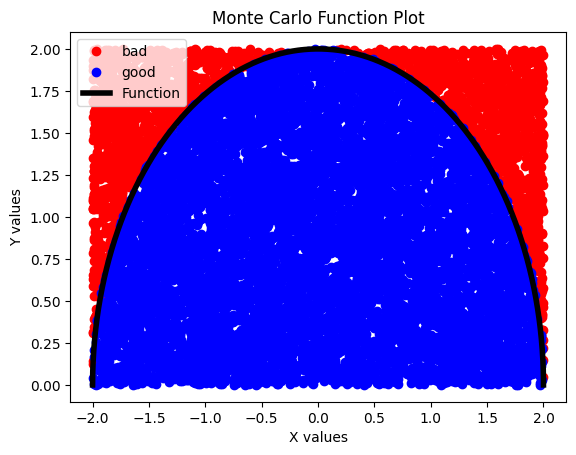

In [70]:
# your code to calculate the area of a half circle using monte carlo
XVals = np.linspace(-2,2,10000)
YVals = mycircle(XVals)
mcintegrate(XVals,YVals,visualize=True)
